In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [194]:
label = pd.read_csv('Credit_card_label.csv')
credit_card = pd.read_csv('Credit_card.csv')

In [195]:
credit_card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [196]:
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


### Vamos a verificar si es posible unir ambos conjuntos de datos, para asi poder trabajar bajo un o solo

In [197]:
# Unir los DataFrames en función de la columna "Ind_ID"
merged_df = credit_card.merge(label, on='Ind_ID', how='inner')

# Verificar si la longitud del DataFrame unido es igual a la longitud de uno de los DataFrames originales
if len(merged_df) == len(credit_card):
    print("Las columnas 'Ind_ID' coinciden en cada registro.")
else:
    print("Las columnas 'Ind_ID' no coinciden en cada registro.")


Las columnas 'Ind_ID' coinciden en cada registro.


In [198]:
data = pd.concat([credit_card, label ['label']], axis = 1)
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [200]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


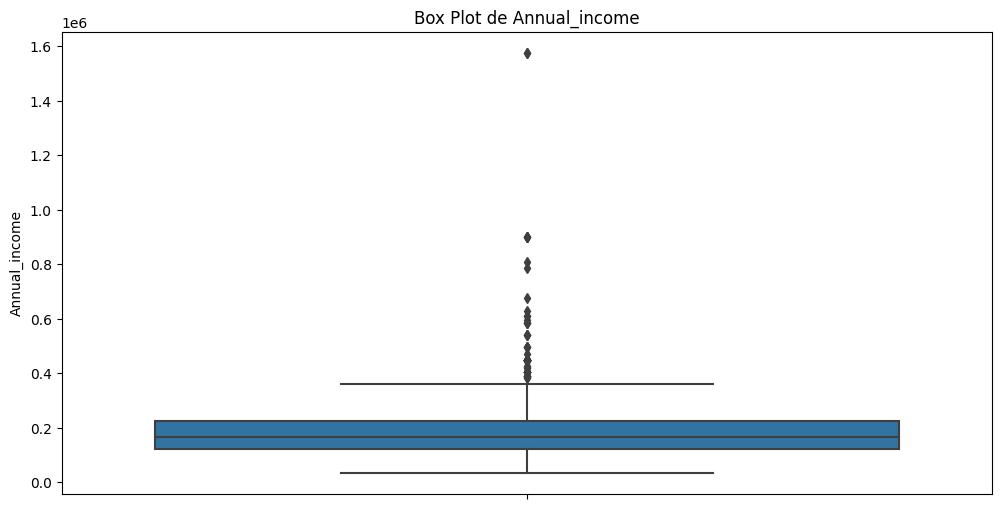

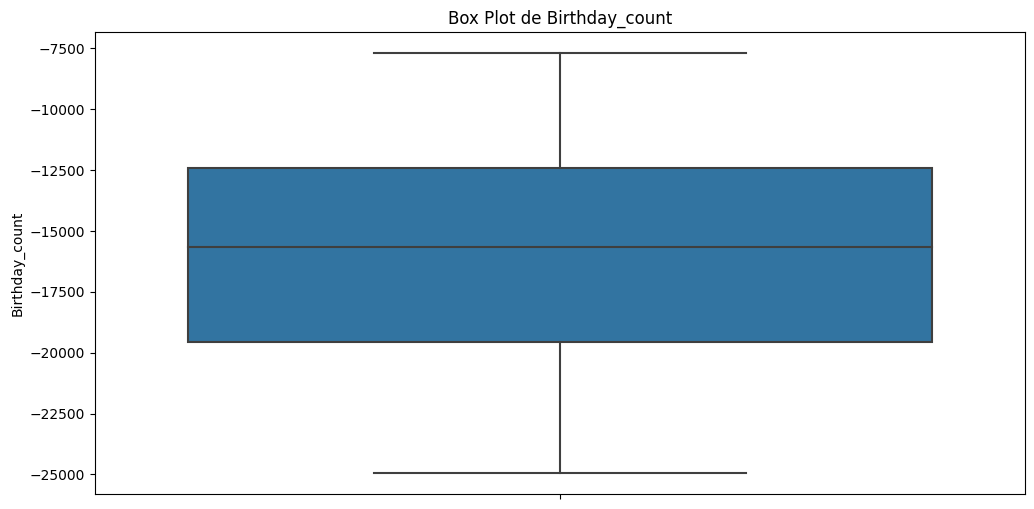

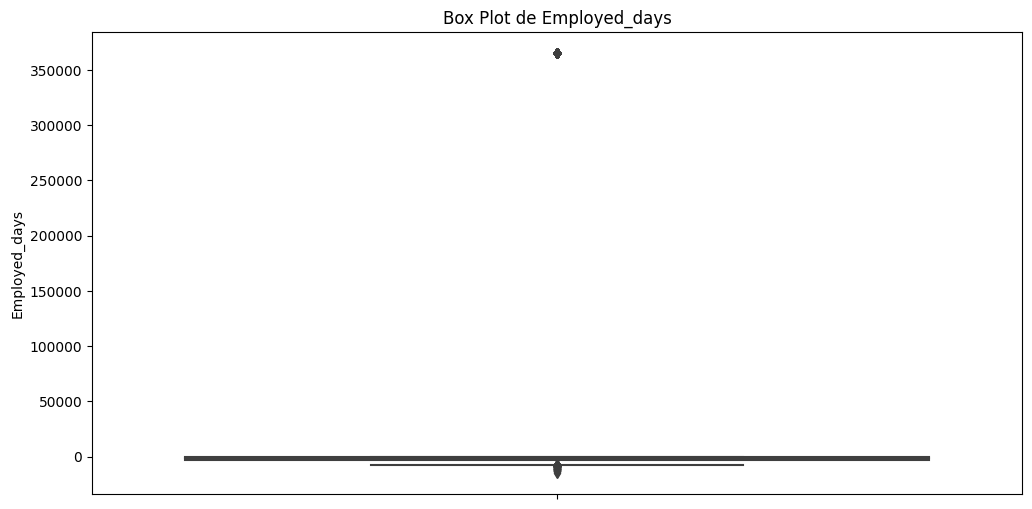

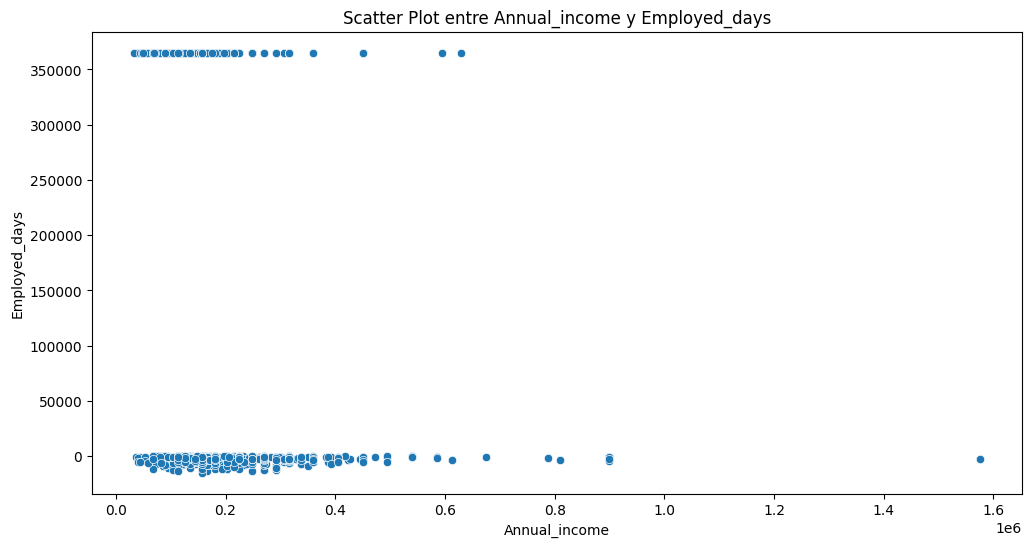

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots para las columnas numéricas relevantes
numeric_columns = ['Annual_income', 'Birthday_count', 'Employed_days']

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='Annual_income')
plt.title('Box Plot de Annual_income')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='Birthday_count')
plt.title('Box Plot de Birthday_count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='Employed_days')
plt.title('Box Plot de Employed_days')
plt.show()

# Scatter plots para relaciones entre columnas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual_income', y='Employed_days')
plt.title('Scatter Plot entre Annual_income y Employed_days')
plt.show()


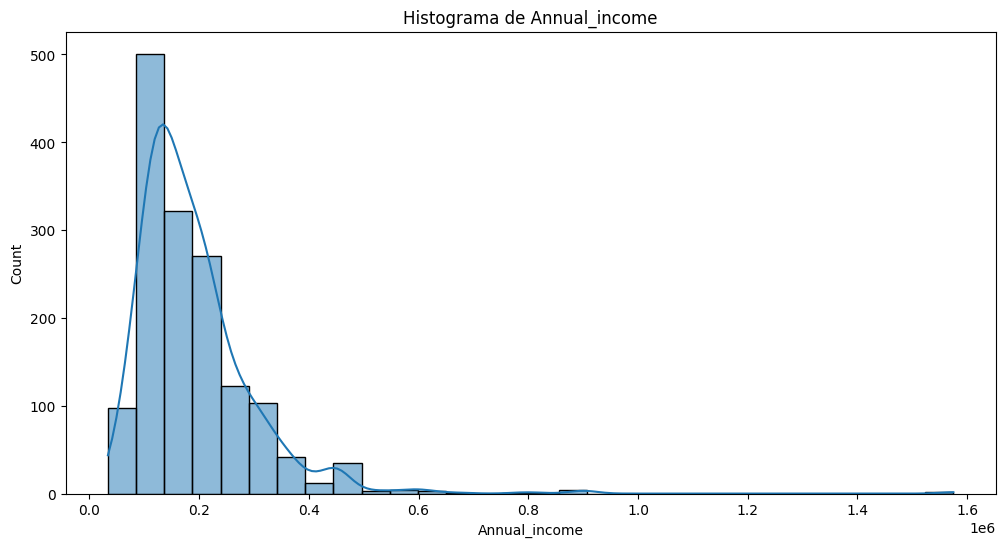

In [202]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual_income'], bins=30, kde=True)
plt.title('Histograma de Annual_income')
plt.show()


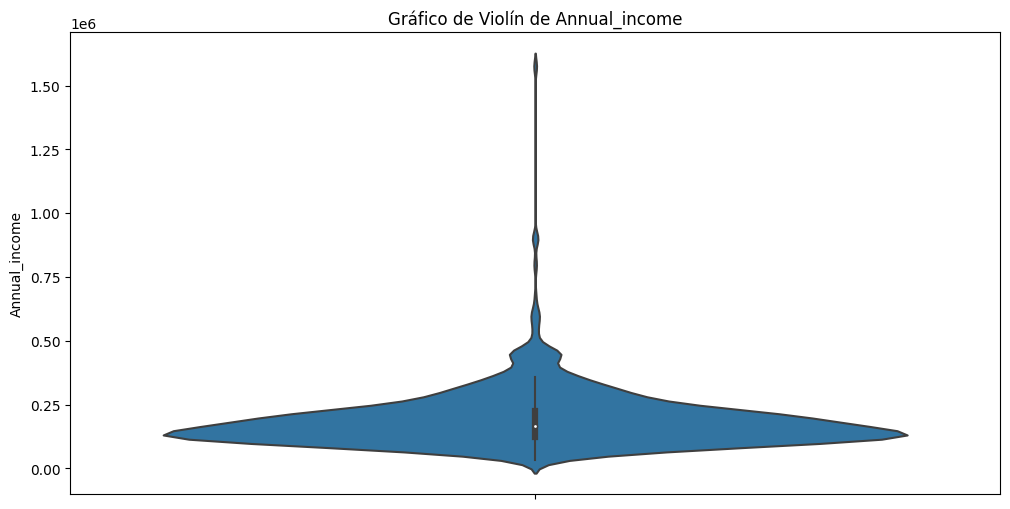

In [203]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, y='Annual_income')
plt.title('Gráfico de Violín de Annual_income')
plt.show()


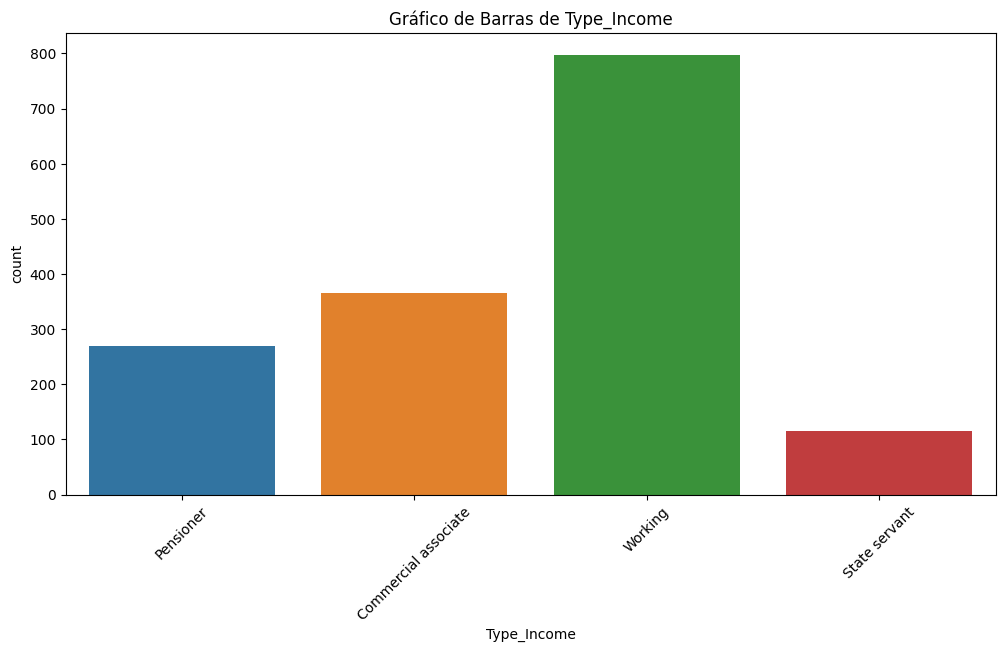

In [204]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Type_Income')
plt.title('Gráfico de Barras de Type_Income')
plt.xticks(rotation=45)
plt.show()


/var/folders/03/wk5brgrd2dscnsxmsb0687vr0000gn/T/ipykernel_3206/1525482239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


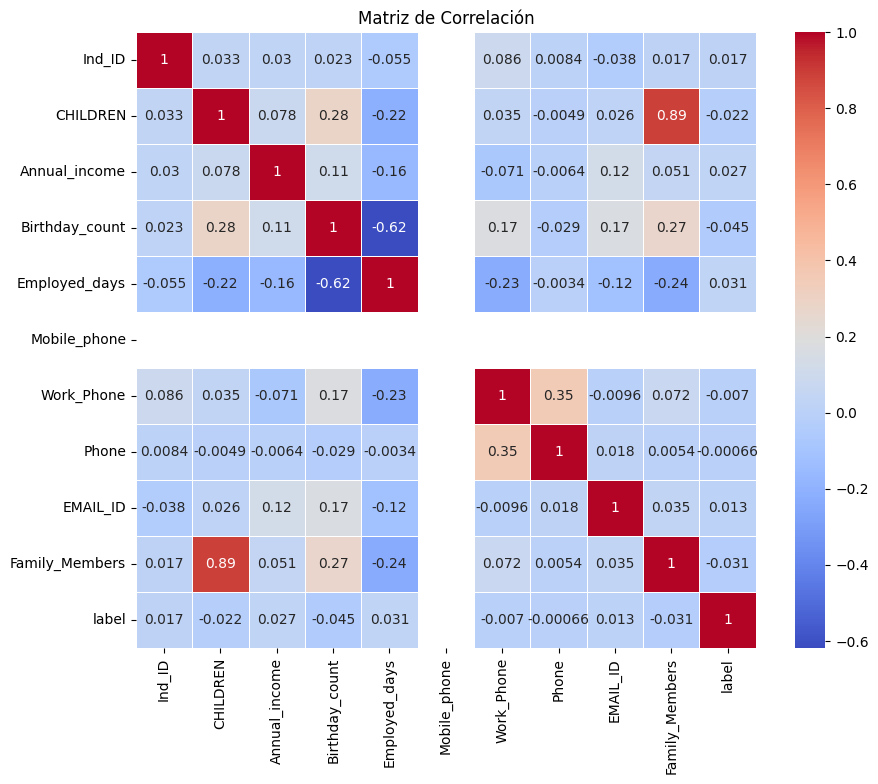

In [205]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [206]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

### Eliminamos columnas de desinteries, como son los datos de contacto

In [207]:
data.drop(['Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis=1, inplace=True)

In [208]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,0


# Limpieza

- Como tenermos datos nulos en Type_Occupation, observamos la columna de Type_Income

In [209]:
data[data['Type_Occupation'].isnull()]['Type_Income'].value_counts()

Pensioner               264
Working                 129
Commercial associate     77
State servant            18
Name: Type_Income, dtype: int64

In [210]:
# condicion = df['Type_Income'] == "Pensioner"
# Usar la función loc para asignar el nuevo valor en la columna "Type_Occupation" según la condición
data.loc[data['Type_Income'] == 'Pensioner', 'Type_Occupation'] = "Unoccupied"

In [211]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    224
Family_Members       0
label                0
dtype: int64

- Se mejoro el espacio de valores nulos
- Ahora a tratar con los otros rasgos con valores nulos

In [212]:
data['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [213]:
data.loc[data['GENDER'].isnull(), 'GENDER'] = 'F'

In [214]:
data.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    224
Family_Members       0
label                0
dtype: int64

- Seguimos con la columna de la edad

In [215]:
data['Birthday_count'].mean()

-16040.342070773264

In [216]:
data.loc[data['Birthday_count'].isnull(), 'Birthday_count'] = -16040.0

In [217]:
data.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Type_Occupation    224
Family_Members       0
label                0
dtype: int64

In [218]:
data.shape

(1548, 15)

### Ahora eliminar trabajar con datos nulos de Annual_income

In [219]:
data[data['Annual_income'].isnull()]['Type_Income'].value_counts()

Working                 11
Commercial associate     8
Pensioner                4
Name: Type_Income, dtype: int64

### Trabajando con el Annual_income en Working

In [220]:
data[data['Type_Income'] == 'Working']['Annual_income'].mean()

181048.75730622618

In [221]:
data.loc[(data['Annual_income'].isnull()) & (data['Type_Income'] == 'Working'), 'Annual_income'] = 181048.75730622618

### Trabajando con el Annual_income en Commercial associate

In [222]:
data[data['Type_Income'] == 'Commercial associate']['Annual_income'].mean()

234600.0

In [223]:
data.loc[(data['Annual_income'].isnull()) & (data['Type_Income'] == 'Commercial associate'), 'Annual_income'] = 234600.0

### Trabajando con el Annual_income en Pensioner

In [224]:
data[data['Type_Income'] == 'Pensioner']['Annual_income'].mean()

155175.0962264151

In [225]:
data.loc[(data['Annual_income'].isnull()) & (data['Type_Income'] == 'Pensioner'), 'Annual_income'] = 155175.0962264151

In [226]:
data.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Type_Occupation    224
Family_Members       0
label                0
dtype: int64

## Trabajando con Valores Nulos de Type_Occupation

In [227]:
data['Type_Occupation'].value_counts()

Unoccupied               269
Laborers                 268
Core staff               172
Managers                 135
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            49
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         8
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [228]:
data[data['Type_Occupation'].isnull()]['Type_Income'].value_counts()

Working                 129
Commercial associate     77
State servant            18
Name: Type_Income, dtype: int64

In [229]:
data[data['Type_Income'] == 'Working']['Type_Occupation'].value_counts()

Laborers                 205
Core staff               100
Sales staff               75
Managers                  68
Drivers                   60
High skill tech staff     36
Medicine staff            23
Accountants               22
Cleaning staff            19
Security staff            18
Cooking staff             18
Private service staff      8
Secretaries                5
Low-skill Laborers         5
HR staff                   3
IT staff                   2
Waiters/barmen staff       2
Name: Type_Occupation, dtype: int64

Yo propondria que donde Type_Income sea __*igual a*__ Working llenar Type_Occupation con Labrers

In [231]:
data.loc[(data['Type_Occupation'].isnull()) & (data['Type_Income'] == 'Working'), 'Type_Occupation'] = 'Laborers'

In [232]:
data.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count      0
Employed_days       0
Type_Occupation    95
Family_Members      0
label               0
dtype: int64

### Tranajando con datos nulos de Type Occupation con Type_Income = Commercial associate 

In [233]:
data[data['Type_Income'] == 'Commercial associate']['Type_Occupation'].value_counts()

Laborers                 54
Managers                 53
Sales staff              47
Core staff               36
Drivers                  22
High skill tech staff    21
Accountants              17
Medicine staff            9
Security staff            7
Private service staff     7
Low-skill Laborers        3
Waiters/barmen staff      3
Cleaning staff            3
Cooking staff             2
Realty agents             2
Secretaries               2
Name: Type_Occupation, dtype: int64

In [234]:
import random

news_values = ['Laborers', 'Managers', 'Sales staff']
condicion = (data['Type_Occupation'].isnull()) & (data['Type_Income'] == 'Commercial associate')

indexes_to_updated = data[condicion].index

for ind in indexes_to_updated:
    new_value = random.choice(news_values)
    data.at[ind, 'Type_Occupation'] = new_value

In [235]:
data.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count      0
Employed_days       0
Type_Occupation    18
Family_Members      0
label               0
dtype: int64

### Tranajando con datos nulos de Type Occupation con Type_Income = State servant 

In [236]:
data[data['Type_Income'] == 'State servant']['Type_Occupation'].value_counts()

Core staff               36
Medicine staff           17
Managers                 14
Laborers                  9
High skill tech staff     8
Accountants               5
Drivers                   4
Secretaries               2
Private service staff     2
Cooking staff             1
Name: Type_Occupation, dtype: int64

In [237]:
data.loc[(data['Type_Occupation'].isnull()) & (data['Type_Income'] == 'State servant'), 'Type_Occupation'] = 'Core staff'

In [238]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [239]:
data[data['label'] == 1].shape

(175, 15)

In [240]:
data[data['label'] == 0].shape

(1373, 15)

In [246]:
valance = 1373 / 175
if valance > 1.5 :
    print('DESVALANCE')
else:
    print('NO DESVALCE')

DESVALANCE


## Outliers

In [244]:
data.loc[data['Annual_income'].idxmax()]

Ind_ID                          5143231
GENDER                                F
Car_Owner                             Y
Propert_Owner                         Y
CHILDREN                              1
Annual_income                 1575000.0
Type_Income        Commercial associate
EDUCATION              Higher education
Marital_status     Single / not married
Housing_type          House / apartment
Birthday_count                 -10142.0
Employed_days                     -2479
Type_Occupation                Managers
Family_Members                        2
label                                 0
Name: 211, dtype: object

In [247]:
data.loc[data['Employed_days'].idxmax()]

Ind_ID                       5008827
GENDER                             M
Car_Owner                          Y
Propert_Owner                      Y
CHILDREN                           0
Annual_income               180000.0
Type_Income                Pensioner
EDUCATION           Higher education
Marital_status               Married
Housing_type       House / apartment
Birthday_count              -18772.0
Employed_days                 365243
Type_Occupation           Unoccupied
Family_Members                     2
label                              1
Name: 0, dtype: object

## Hacer dummies

In [242]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,Unoccupied,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Sales staff,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-16040.0,-586,Sales staff,2,1
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Sales staff,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Managers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,234600.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,0


In [248]:
def createDummies(df, var_name): #crear una funcion que haga todo el proceso
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [250]:
def createDummiesAtList(df, column_names):
    for var_name in column_names:
        dummy = pd.get_dummies(df[var_name], prefix=var_name)
        df = df.drop(var_name, axis = 1)
        df = pd.concat([df, dummy], axis=1)
    return df

In [252]:
columns_to_dummy = ['GENDER', 'Car_Owner','Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type','Type_Occupation']

In [253]:
data = createDummiesAtList(data, columns_to_dummy)

In [256]:
data

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label,GENDER_F,GENDER_M,Car_Owner_N,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unoccupied,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,-18772.0,365243,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5009744,0,315000.0,-13557.0,-586,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5009746,0,315000.0,-16040.0,-586,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5009749,0,234600.0,-13557.0,-586,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5009752,0,315000.0,-13557.0,-586,2,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,234600.0,-11957.0,-2182,2,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1544,5023655,0,225000.0,-10229.0,-1209,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,180000.0,-13174.0,-2477,4,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1546,5118219,0,270000.0,-15292.0,-645,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
data.shape

(1548, 52)

## Aplicando Algoritmos

In [269]:
def distancia(x1, x2):
    d = np.sqrt(np.sum((x1 - x2) ** 2))
    return d

In [259]:
class KNN:
    def __init__(self, k=3, X_train=None, y_train=None):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def fitYo(self, X_train, y_train):
        # Guardar los datos de entrenamiento en los atributos de la clase
        self.X_train = X_train
        self.y_train = y_train

    def prediccion(self, X):
        # Realiza predicciones en un conjunto de datos de prueba
        y_pred = [self.prediccion_2(x) for x in X]
        return np.array(y_pred)

    def prediccion_2(self, x):
        # Calcula las distancias entre x y todos los puntos de entrenamiento
        distancias = [distancia(x, x_train) for x_train in self.X_train]
        # Obtiene los índices de los k vecinos más cercanos
        k_indices = np.argsort(distancias)[:self.k]
        # Obtiene las etiquetas de los k vecinos más cercanos
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Devuelve la etiqueta más común entre los k vecinos
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [264]:
columns_to_X = data.columns.to_list()
columns_to_X.remove('Ind_ID')
columns_to_X.remove('label')

In [265]:
X = data[columns_to_X]
y = data['label']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [270]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [271]:
# Crear una instancia del clasificador k-NN con k=3
knn = KNN(k=3)

# Entrenar el modelo con los datos de entrenamiento
knn.fitYo(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = knn.prediccion(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo: {accuracy*100} %')

Precisión del modelo: 87.52688172043011 %


In [272]:
# Crear una instancia del clasificador k-NN con k=1
knn = KNN(k=1)

# Entrenar el modelo con los datos de entrenamiento
knn.fitYo(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = knn.prediccion(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo: {accuracy*100} %')

Precisión del modelo: 86.66666666666667 %


In [273]:
# Crear una instancia del clasificador k-NN con k=5
knn = KNN(k=5)

# Entrenar el modelo con los datos de entrenamiento
knn.fitYo(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = knn.prediccion(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo: {accuracy*100} %')

Precisión del modelo: 86.88172043010752 %


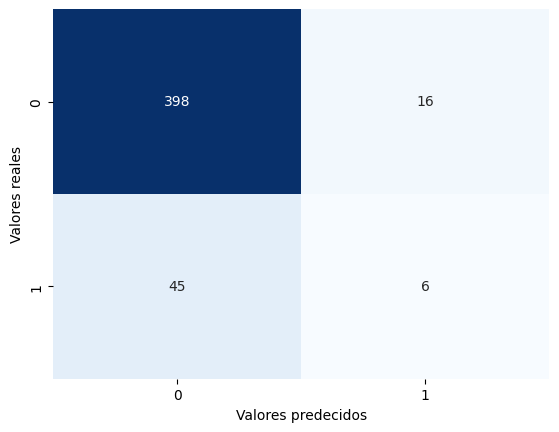

In [275]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, predicciones)
sns.heatmap(matriz,annot=True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.show()